### Longwave dispersion relationship:

$\omega = k\sqrt{gh}$

In [1]:
import numpy as np

twopi = 2 * np.pi

L = 10500  # Lambda [m].
H = 500.  # Water column depth [m].
N0 = 10  # Wave amplitude [m].
K = twopi / L  # Wavenumber [m^{-1}].
g = 9.8  # Aceleration of gravity [m s^{-2}]
w = np.sqrt(g * K ** 2 * H)  # Longwave dispersion [rad s^{-1}].
T = twopi/ w  # Period [s].

t = np.arange(0, 4 * T)

z000, z100, z200, z300, z400, z500 = 0, -100, -200, -300, -400, -500

In [2]:
HoL = H/L
if HoL < 1./20:
    print("H/L = {:.2f}: Longwave!".format(HoL))
else:
    print("H/L = {:.2f}: This is not a longwave :(".format(HoL))

H/L = 0.05: Longwave!


The code below solve the following equations (Check them out in the course notes!):

Free surface displacement: $\eta = N_o\cos({kx - \omega t})$

x displacement: $\chi = -\frac{\eta_o}{kH}\sin({kx - \omega t})$

z displacement: $\zeta = \frac{\eta_o}{H}(z + H)\cos({kx - \omega t})$

In [3]:
def plot_paths(ax, x=0, color='grey', alpha=0.75, linewidth=3):
    X = -(N0 / K * H) * np.sin((K * x) - (w * t)) + x
    
    Z000 = ((N0 / H) * (z000 + H)) * np.cos((K * x) - (w * t)) + z000
    Z100 = ((N0 / H) * (z100 + H)) * np.cos((K * x) - (w * t)) + z100
    Z200 = ((N0 / H) * (z200 + H)) * np.cos((K * x) - (w * t)) + z200
    Z300 = ((N0 / H) * (z300 + H)) * np.cos((K * x) - (w * t)) + z300
    Z400 = ((N0 / H) * (z400 + H)) * np.cos((K * x) - (w * t)) + z400
    Z500 = ((N0 / H) * (z500 + H)) * np.cos((K * x) - (w * t)) + z500

    kw = dict(color=color, alpha=alpha, linewidth=linewidth)
    lines = ax.plot(X, Z000,
                    X, Z100,
                    X, Z200,
                    X, Z300,
                    X, Z400,
                    X, Z400,
                    X, Z500, **kw)
    return lines

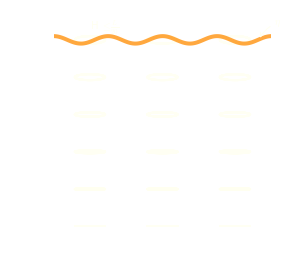

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4, 4))

kw = dict(color='ivory', alpha=0.75, linewidth=2)
lines0 = plot_paths(ax, x=-4e7, **kw)
lines1 = plot_paths(ax, x=0, **kw)
lines2 = plot_paths(ax, x=4e7, **kw)

ax.set_xlabel(r'Distância $\frac{m}{2\pi}$')
ax.set_ylabel('Profundidade m')

N = N0 * np.cos((K * 0) - (w * t))
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, N.size)
ax.plot(x, N, color='darkorange', linewidth=4, alpha=.75)

ax.annotate(r'$\eta$', xy=(x[-35], N[-35]),  xycoords='data',
            xytext=(15, 15), textcoords='offset points',
            color='ivory',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=0.2",
                            color='ivory'))

ax.text(-4e7, 30, r'H $\leq \frac{L}{20}$', color='ivory')
fig.tight_layout()
ax.axis('off')
ax.set_ylim(-520, 90)
fig.savefig("shallow_water_waves.svg", bbox_inches='tight',
           transparent=True)